# 📊 Capstone Project - Menu Sales Forecast Final Report

## 1. Data Loading
We begin by importing necessary libraries and loading the dataset containing sales data for menu items from 2023 to 2025.

In [1]:
import pandas as pd

# Load menu sales data
df = pd.read_csv(r'C:\Users\vegan\OneDrive\Desktop\Chicana\Sales\Chicana Sales by Item 2023-2025 Master.csv', encoding='latin1')


# Data Preview
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(172478, 9)
   Order #       Order Date      Menu Item       Menu Group             Menu  \
0    114.0  6/29/2025 18:48      Horchata*   Aguas | Drinks   Aguas | Drinks   
1    113.0  6/29/2025 18:47     Asada Taco     Street Tacos     Street Tacos   
2    113.0  6/29/2025 18:47  Carnitas Taco     Street Tacos     Street Tacos   
3    113.0  6/29/2025 18:47  Mexgogi Fries  Signature Fries  Signature Fries   
4    112.0  6/29/2025 18:46  Mexgogi Fries  Signature Fries  Signature Fries   

  Sales Category Net Price  Qty  Void?  
0         Drinks      5.25  1.0  False  
1           Food      3.75  1.0  False  
2           Food      3.75  1.0  False  
3           Food     15.25  1.0  False  
4           Food     15.25  1.0  False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172478 entries, 0 to 172477
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Order #         166615 non-null  float64
 1   Order Da

## 2. Data Cleaning
We clean the data by converting data types, removing voided transactions, and dropping unnecessary columns.

In [2]:
# Convert Net Price to numeric
df['Net Price'] = df['Net Price'].replace(r'[\$,]', '', regex=True).astype(float)

In [3]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [4]:
# Remove voided transactions
df = df[df['Void?'] == False]

In [9]:
# Drop Unnecessary Columns
df = df.drop(columns=['Order #', 'Void?'])

## 3. Data Overview
Here we explore the dataset to understand its structure and key statistics.

In [ ]:
print(df.info())
print(df.describe())
df.head()

In [11]:
# Handle missing values
df.dropna(subset=['Menu Item', 'Net Price', 'Qty'], inplace=True)

In [13]:
# Create time feature
df['DayOfWeek'] = df['Order Date'].dt.day_name()
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

In [15]:
# Convert if order date include time
df['Hour'] = df['Order Date'].dt.hour

In [17]:
# Preview first five rows
df.head()

,Order Date,Menu Item,Menu Group,Menu,Sales Category,Net Price,Qty,DayOfWeek,Month,Year,Hour
0,2025-06-29 18:48:00,Horchata*,Aguas | Drinks,Aguas | Drinks,Drinks,5.25,1.0,Sunday,6,2025,18
1,2025-06-29 18:47:00,Asada Taco,Street Tacos,Street Tacos,Food,3.75,1.0,Sunday,6,2025,18
2,2025-06-29 18:47:00,Carnitas Taco,Street Tacos,Street Tacos,Food,3.75,1.0,Sunday,6,2025,18
3,2025-06-29 18:47:00,Mexgogi Fries,Signature Fries,Signature Fries,Food,15.25,1.0,Sunday,6,2025,18
4,2025-06-29 18:46:00,Mexgogi Fries,Signature Fries,Signature Fries,Food,15.25,1.0,Sunday,6,2025,18


In [19]:
# Check columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171337 entries, 0 to 172477
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Order Date      171337 non-null  datetime64[ns]
 1   Menu Item       171337 non-null  object        
 2   Menu Group      169650 non-null  object        
 3   Menu            169650 non-null  object        
 4   Sales Category  170850 non-null  object        
 5   Net Price       171337 non-null  float64       
 6   Qty             171337 non-null  float64       
 7   DayOfWeek       171337 non-null  object        
 8   Month           171337 non-null  int32         
 9   Year            171337 non-null  int32         
 10  Hour            171337 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(5)
memory usage: 13.7+ MB


In [21]:
# Show sample rows randomly
df.sample(5)

,Order Date,Menu Item,Menu Group,Menu,Sales Category,Net Price,Qty,DayOfWeek,Month,Year,Hour
99523,2024-02-14 18:36:00,Tres Lechezs,NaN,NaN,Food,7.25,1.0,Wednesday,2,2024,18
53836,2024-09-14 18:11:00,Mexgogi Taco,Street Tacos,Street Tacos,Food,8.00,2.0,Saturday,9,2024,18
51363,2024-09-27 17:29:00,Mex Quesadilla,Chicana Grub,Chicana Grub,Food,13.75,1.0,Friday,9,2024,17
3598,2025-06-13 13:55:00,Jamaica (Agua Fresca),Aguas | Drinks,Aguas | Drinks,Drinks,5.25,1.0,Friday,6,2025,13
133731,2023-09-06 18:03:00,Hotty Burger & Fries,Burgers & Melts,Burgers & Melts,Food,16.95,1.0,Wednesday,9,2023,18


In [23]:
# Remove duplicate column
df.drop(columns=['Menu'], inplace=True)

In [25]:
# Show sample rows randomly
df.sample(5)

,Order Date,Menu Item,Menu Group,Sales Category,Net Price,Qty,DayOfWeek,Month,Year,Hour
102154,2024-02-02 17:38:00,Mushroom Melt,Burgers & Melts,Food,15.75,1.0,Friday,2,2024,17
151452,2023-06-24 15:45:00,Season Fries,Sides,Appetizers,6.50,1.0,Saturday,6,2023,15
135728,2023-08-28 17:43:00,Mexican Coke (bottle),Aguas | Drinks,Drinks,7.00,2.0,Monday,8,2023,17
7941,2025-05-21 12:09:00,Breakfast Burger,Breakfast Menu,Food,15.00,1.0,Wednesday,5,2025,12
159328,2023-05-21 15:07:00,Asada Taco,Street Tacos,Food,3.00,1.0,Sunday,5,2023,15


In [27]:
# Clean special characters
# Example: Clean 'Menu Item' column
df['Menu Item'] = df['Menu Item'].str.encode('ascii', errors='ignore').str.decode('ascii')

In [29]:
# Show sample rows randomly
df.sample(5)

,Order Date,Menu Item,Menu Group,Sales Category,Net Price,Qty,DayOfWeek,Month,Year,Hour
94684,2024-03-05 18:00:00,Al Pastor Taco,Taco Tuesday,Food,5.50,2.0,Tuesday,3,2024,18
100733,2024-02-09 18:22:00,Side of fries,Sides,Appetizers,6.50,1.0,Friday,2,2024,18
21472,2025-03-12 13:12:00,Cali-Bae Rito,Chicana Grub,Food,14.75,1.0,Wednesday,3,2025,13
127250,2023-10-07 13:00:00,Cali Dreamin' Burger & Fries,Burgers & Melts,Food,16.95,1.0,Saturday,10,2023,13
93345,2024-03-11 13:25:00,El Classico,Chicana Grub,Food,13.00,1.0,Monday,3,2024,13


In [31]:
# Confirm special character in Ryahs Menu is gone
df[df['Menu Item'].str.contains('Ryah', na=False)]

,Order Date,Menu Item,Menu Group,Sales Category,Net Price,Qty,DayOfWeek,Month,Year,Hour


<Axes: title={'center': 'Top 10 Menu Items by Quantity Sold'}, xlabel='Menu Item'>

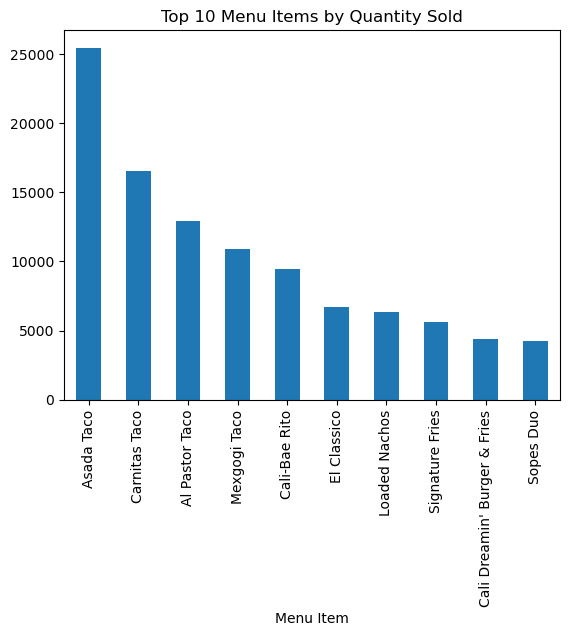

In [33]:
# Show top 10 menu items
top_items = df.groupby('Menu Item')['Qty'].sum().sort_values(ascending=False).head(10)
top_items.plot(kind='bar', title='Top 10 Menu Items by Quantity Sold')

<Axes: title={'center': 'Total Sales by Day of Week'}, xlabel='DayOfWeek'>

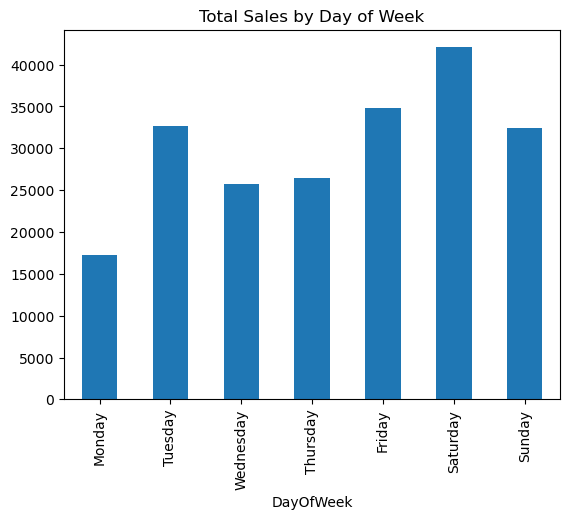

In [34]:
# Sales by day of the week
df.groupby('DayOfWeek')['Qty'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', title='Total Sales by Day of Week')

In [37]:
# Loop through all object-type columns and remove curly quotes
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace(r"[’‘´`]", "'", regex=True)
    df[col] = df[col].str.encode('ascii', errors='ignore').str.decode('ascii')

<Axes: title={'center': 'Revenue by Menu Group'}, xlabel='Menu Group'>

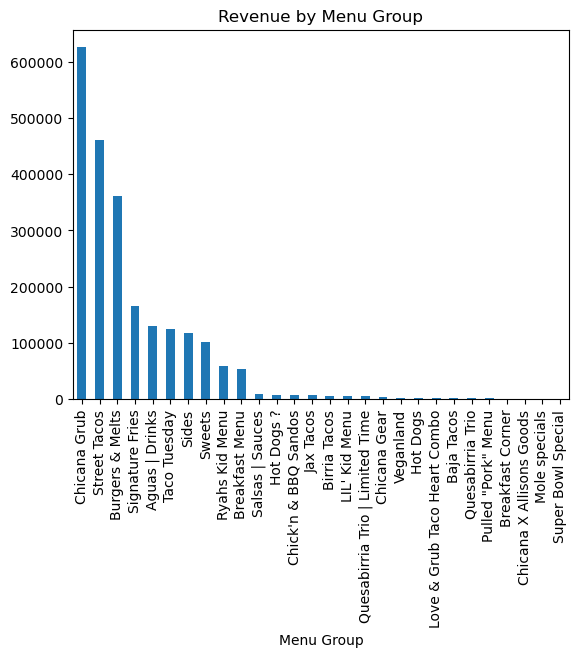

In [38]:
# Clean All Text Columns in the DataFrame
df['Revenue'] = df['Qty'] * df['Net Price']

df.groupby('Menu Group')['Revenue'].sum().sort_values(ascending=False).plot(
    kind='bar', title='Revenue by Menu Group'
)

In [41]:
# remove nan and/ or Nan
df = df[df['Sales Category'].astype(str).str.lower() != 'nan']

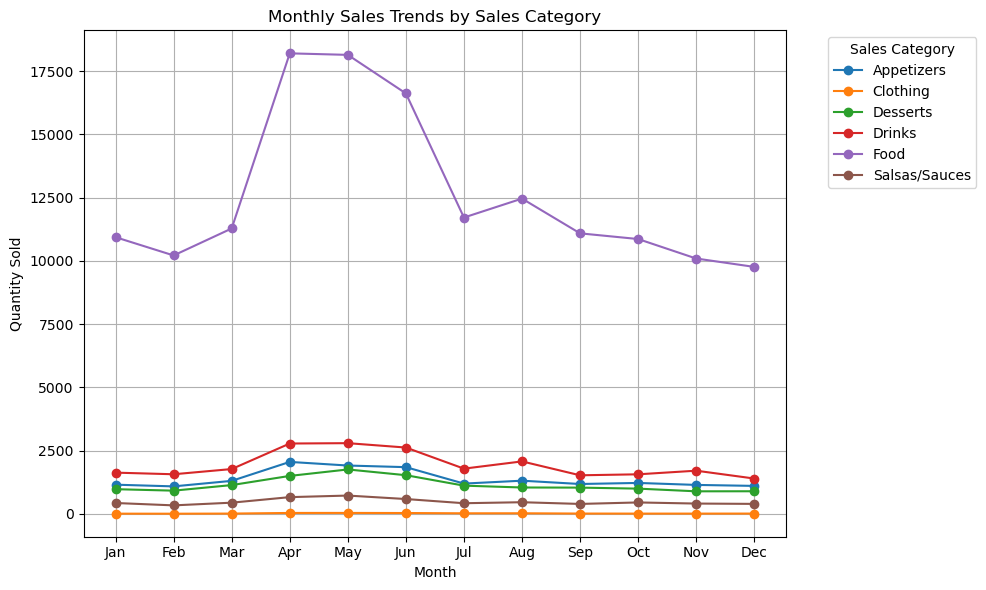

In [43]:
# Drop rows with missing Sales Category
df = df.dropna(subset=['Sales Category'])

# Group data AFTER cleaning
category_month = (
    df.groupby(['Sales Category', 'Month'])['Qty']
    .sum()
    .unstack()
    .fillna(0)  # fill missing combinations with 0
)

# Plot
import matplotlib.pyplot as plt

ax = category_month.T.plot(kind='line', marker='o', figsize=(10, 6))

ax.set_title('Monthly Sales Trends by Sales Category')
ax.set_xlabel('Month')
ax.set_ylabel('Quantity Sold')
ax.legend(title='Sales Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
# Decision Tree Regressor

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [48]:
# select features and targets
features = ['Net Price', 'Month', 'DayOfWeek', 'Sales Category']
target = 'Qty'

In [49]:
# Select only relevant columns
features = ['Net Price', 'Month', 'DayOfWeek', 'Sales Category']
target = 'Qty'

# Create a copy of your working DataFrame
df_model = df[features + [target]].copy()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['DayOfWeek', 'Sales Category']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le


In [50]:
# split data
from sklearn.model_selection import train_test_split

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Update features
features = ['Net Price', 'Month', 'DayOfWeek', 'Sales Category', 'Menu Item']
target = 'Qty'

In [52]:
# encode columns
df_model = df[features + [target]].copy()

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['DayOfWeek', 'Sales Category', 'Menu Item']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le


In [59]:
# split data
from sklearn.model_selection import train_test_split

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# train model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Baseline Model Results (with Menu Item):")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Baseline Model Results (with Menu Item):
Mean Squared Error (MSE): 0.06
R² Score: 0.89


In [63]:
# Random Forest Regressor

In [65]:
#import model
from sklearn.ensemble import RandomForestRegressor

In [67]:
# train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
# evaluate model
y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Results:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


Random Forest Model Results:
Mean Squared Error (MSE): 0.05
R² Score: 0.92


In [321]:
# Feature Importance Plot: Shows which features had the biggest impact on predicting quantity sold

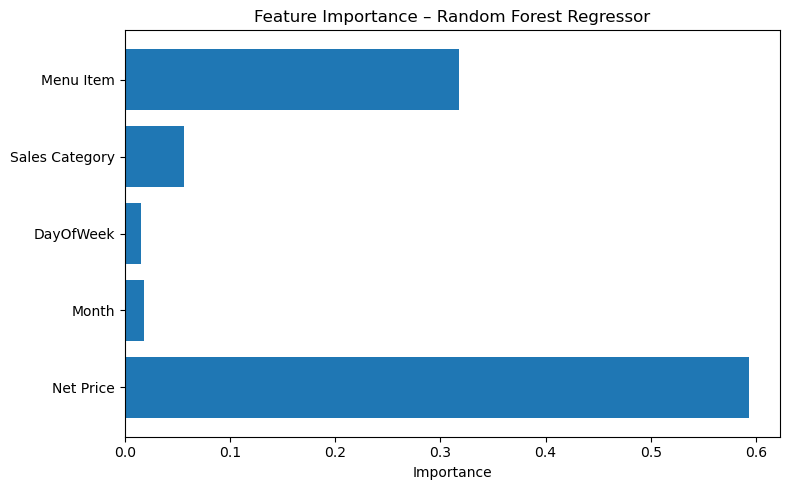

In [325]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.title('Feature Importance – Random Forest Regressor')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
#
To predict the number of menu items sold (Qty), I used regression models because the target variable is numeric. As a baseline model, I selected a 
Decision Tree Regressor due to its ease and ability to handle both categorical and numerical features without scaling. I improved performance by 
using a Random Forest Regressor, an ensemble method that reduces overfitting and typically provides more accurate predictions.

Results
Baseline (Decision Tree):

R² Score: 0.89

MSE: 0.06

Improved Model (Random Forest):

R² Score: 0.92

MSE: 0.05

These results show that the Random Forest model provides a strong fit, explaining 92% of the variance in quantity sold with minimal error. This model 
will serve as the foundation for further tuning and evaluation in the final module.

# 🤖 Modeling Menu Sales

## 1. Import Libraries
We start by importing the necessary libraries for regression modeling.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load and Prepare Data

In [ ]:
# Load cleaned dataset
df = pd.read_csv('Chicana Sales by Item 2023-2025 Master.csv', encoding='latin1')

# Convert 'Net Price' to numeric
df['Net Price'] = df['Net Price'].replace(r'[\$,]', '', regex=True).astype(float)

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Remove voided transactions
df = df[df['Void?'] == False]

# Drop unnecessary columns
df = df.drop(columns=['Order #', 'Void?'])

# Feature engineering (example: extract month and year from order date)
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Choose target and features
features = ['Quantity', 'Year', 'Month']
target = 'Net Price'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Linear Regression Model

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr:.2f}")
print(f"Linear Regression R²: {r2_lr:.2f}")


## 4. Random Forest Regressor with Grid Search

In [ ]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Best Random Forest Parameters:", grid_search.best_params_)
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")


## 5. Model Comparison

In [ ]:
print("Model Comparison:")
print(f"Linear Regression R²: {r2_lr:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")


## 6. Conclusion
Based on R² scores, we can determine which model better fits our data and make recommendations for future forecasting.